In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
#we did import here importnat libraries

In [2]:
df=pd.read_csv("../../Databases/WA_Fn-UseC_-Telco-Customer-Churn.csv") #we load and read the dataset

In [3]:
df.head() #we use df.head() to get the first 5 rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info() 
#we use df.info() to get information about the dataset like the number of rows and columns and the data type of each column in the dataset also we can use it to find missing values aswell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().sum() #we need to check for duplicates in the dataset with the ID 

np.int64(0)

In [6]:
df=df.drop(['customerID'],axis=1) #we drop customerID because it's not a useful feature we dont actually need to predict the churn
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.duplicated().sum() #so beacause we did drop the ID here we will not delete the duplicates beacause they can be 2 customers with the same behaviour

np.int64(22)

In [8]:
df.describe() #just to get a feeling about the dataset distribution (the describe method only works when data is numerical) 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df['gender'].nunique() #to check the number of unique categories

2

In [10]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'The number of unique values in {col} is {df[col].unique()}') #we just did automate the process 

#the main goal here was to check for ovbious inconsistencies like having 2 unique categories whith the same value like (YES and Yes and yes or no and No etc..)
#well also here the totalcharges feature is numirical but beacause its not and integer it was considerded as object

The number of unique values in gender is ['Female' 'Male']
The number of unique values in Partner is ['Yes' 'No']
The number of unique values in Dependents is ['No' 'Yes']
The number of unique values in PhoneService is ['No' 'Yes']
The number of unique values in MultipleLines is ['No phone service' 'No' 'Yes']
The number of unique values in InternetService is ['DSL' 'Fiber optic' 'No']
The number of unique values in OnlineSecurity is ['No' 'Yes' 'No internet service']
The number of unique values in OnlineBackup is ['Yes' 'No' 'No internet service']
The number of unique values in DeviceProtection is ['No' 'Yes' 'No internet service']
The number of unique values in TechSupport is ['No' 'Yes' 'No internet service']
The number of unique values in StreamingTV is ['No' 'Yes' 'No internet service']
The number of unique values in StreamingMovies is ['No' 'Yes' 'No internet service']
The number of unique values in Contract is ['Month-to-month' 'One year' 'Two year']
The number of unique values 

In [11]:
print(df['TotalCharges'][df['TotalCharges'].str.contains('",\'\'\\;;')])

Series([], Name: TotalCharges, dtype: object)


In [12]:
df['TotalCharges'].value_counts() #well here we did find some missing values !
#for now we are just exploring we will deal with them later

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

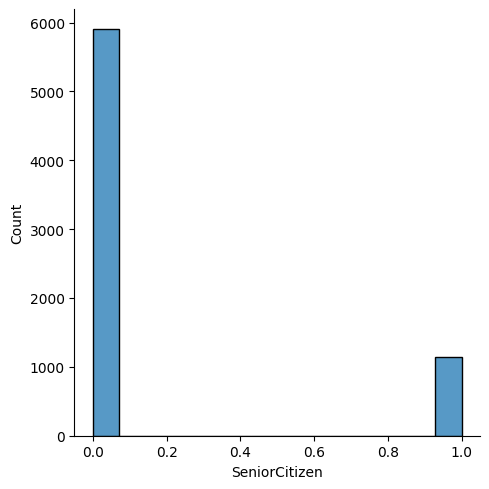

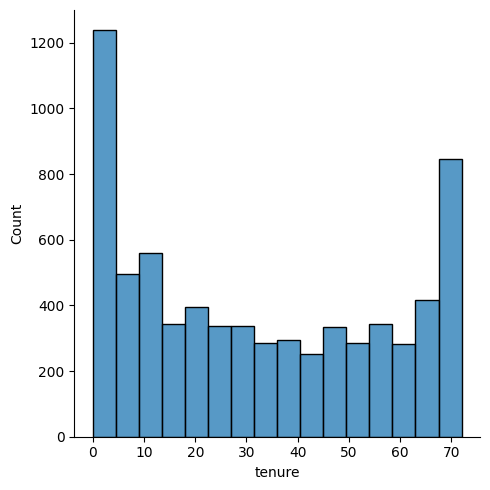

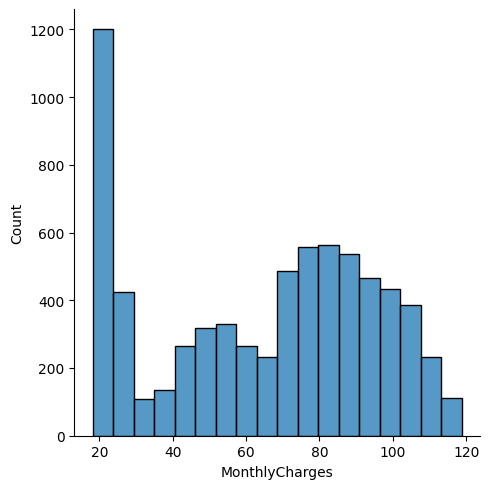

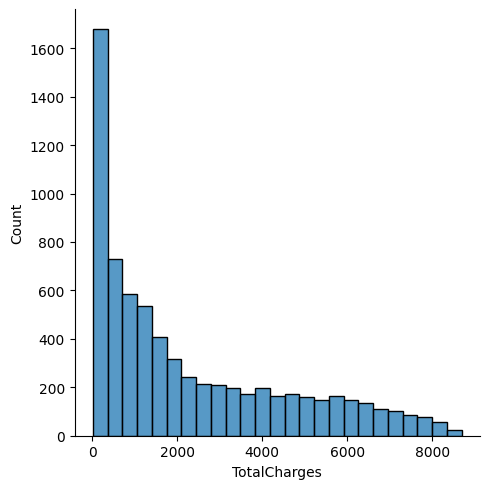

In [14]:
#now will plot the distribution of the numerical features

for col in df.select_dtypes(include=['int64','float64']).columns:
    sns.displot(df[col])    
    plt.show()  

In [15]:
#from this 4 plots we can gain the following insights:
#1- the majority of the customers are not senior citizens (seanior citizens=0) which mean that most of our customers are young less than 65 years old
#2- while the average tenure is 32 months for normal customers we can observe that a lot of them have a tenure of 0 months which eather means that they are new customers or they have left the service so early (the service must be terrible)
#3- the average monthly charges are 64.76 which mean that most of our customers pay around 64.76$ per month and also a lot of them pay (20$ per month)
#4- the totolcharges is left skewed with a rught tail is the logic way ! as the charges increase the number of customers decreases

#form this we can creat our first intuitions about the cosumer behaviour it can be right or wrong but it's a good starting point:
#"most of our customers are young less than 65 years old, they are new customers they pay around (20$,60$) per month and the lowest the totalcharges is the higher the number of customers are"

In [16]:
#now we will check for skewness in the numerical features

for col in df.select_dtypes(include=['int64','float64']).columns:
    print(f'The skewness of {col} is {df[col].skew()}')
    print(f'The kurtosis of {col} is {df[col].kurt()}') 

The skewness of SeniorCitizen is 1.8336327440928564
The kurtosis of SeniorCitizen is 1.3625958957939108
The skewness of tenure is 0.2395397495619829
The kurtosis of tenure is -1.387371635971685
The skewness of MonthlyCharges is -0.22052443394398033
The kurtosis of MonthlyCharges is -1.2572596945495056
The skewness of TotalCharges is 0.961642499724251
The kurtosis of TotalCharges is -0.231798760869379


In [17]:
#from this we can see that:

#skewness:
#for seniorcitizen the skewness is 1.8 which is highly positive which means that the data is right skewed
#for tenure the skewness is 0.2 which is slightly positive which means that the data is slightly right skewed 
#for monthlycharges the skewness is -0.2 which is slightly negative which means that the data is slightly left skewed

#kurtosis:
#for seniorcitizen the kurtosis is 1.3 which mean that the data is highly right skewed which indicate some extreme values or outliers
#for tenure the kurtosis is -1.3 which mean that the data have a light tails and is slightly flattered with a low peak 
#for monthlycharges the kurtosis is -1.2 same as the kurtosis of tenure

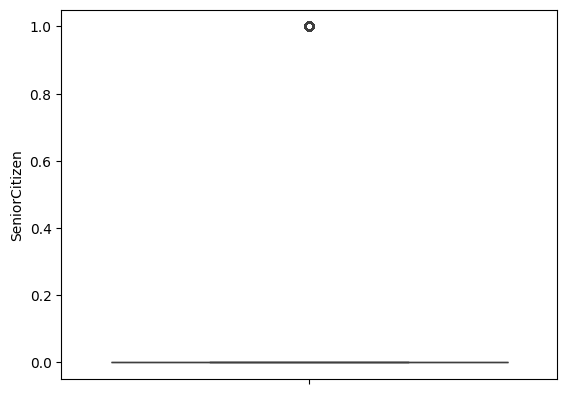

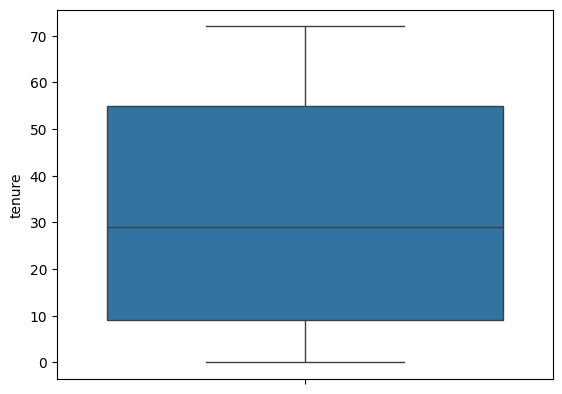

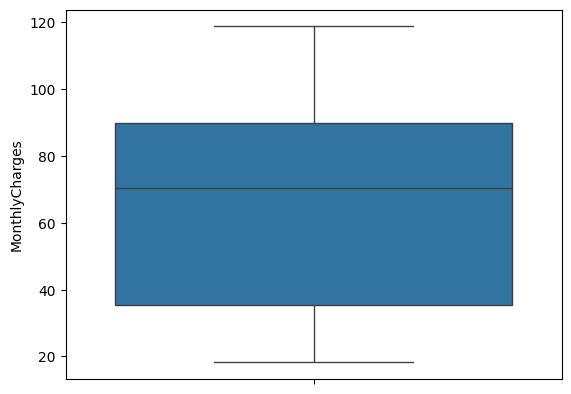

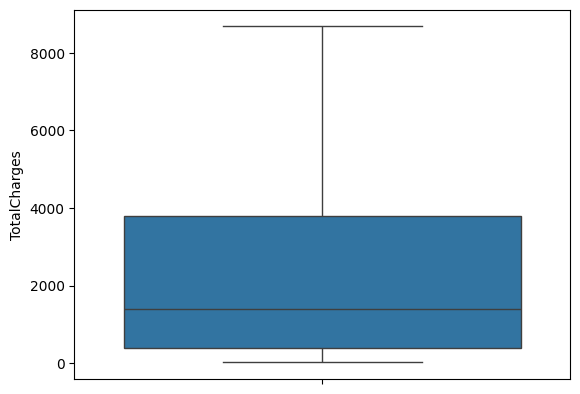

In [18]:
#now we will plot the boxplot of the numerical features

for col in df.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(data=df[col])
    plt.show()

In [19]:
#there is no new conclusion from this plots

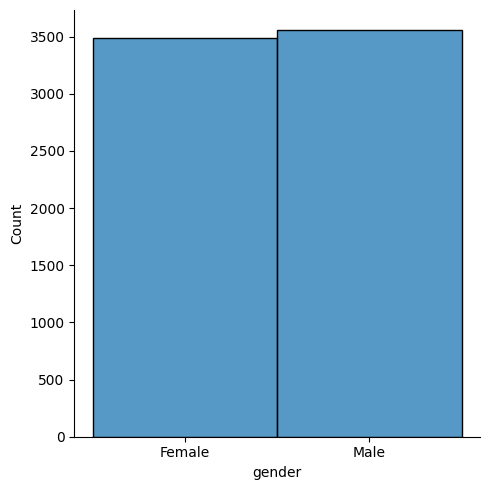

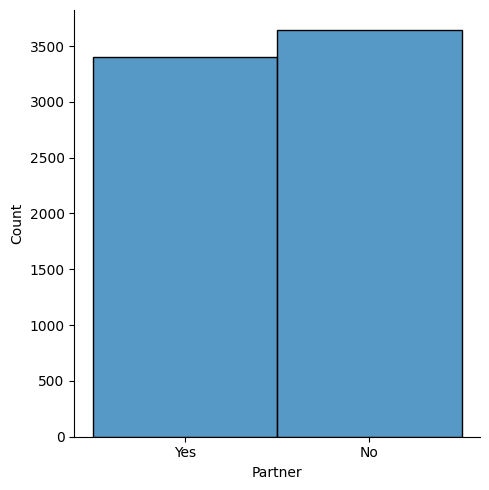

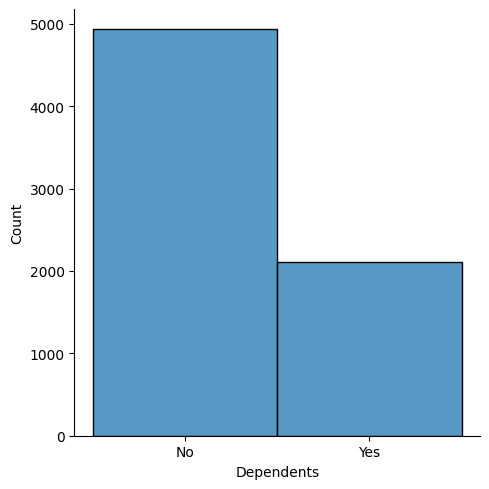

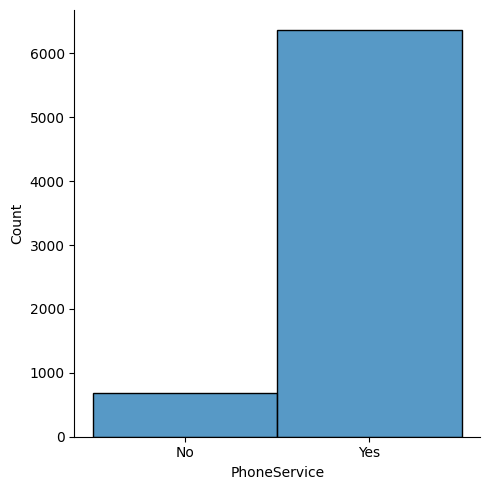

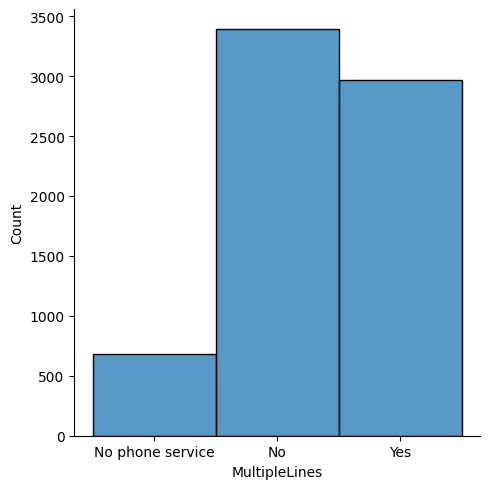

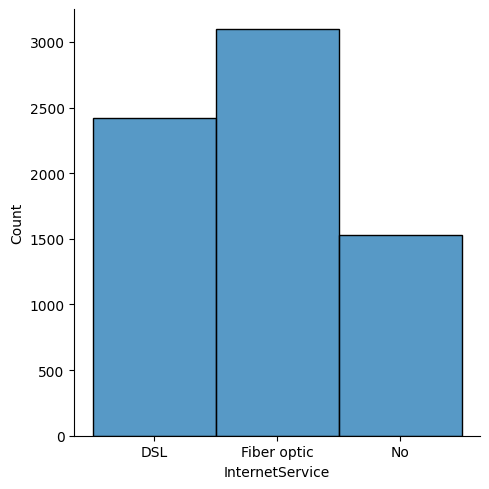

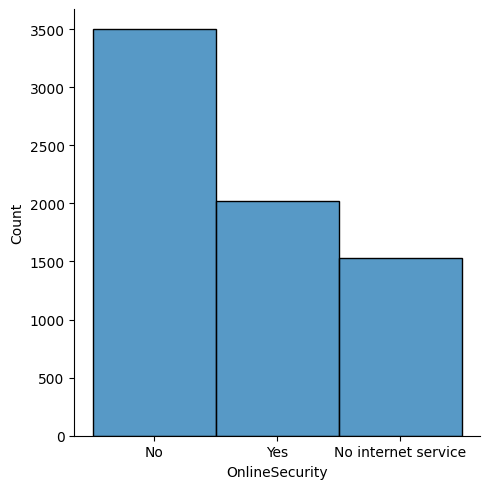

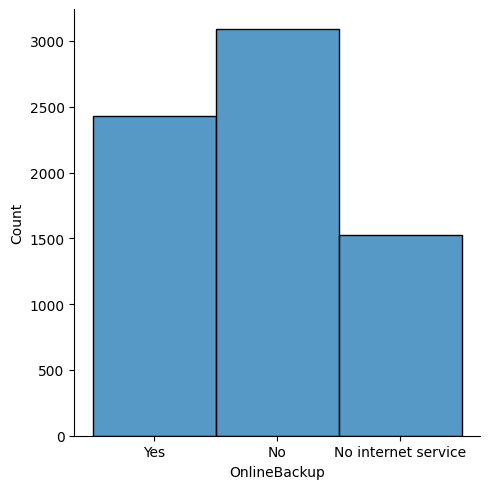

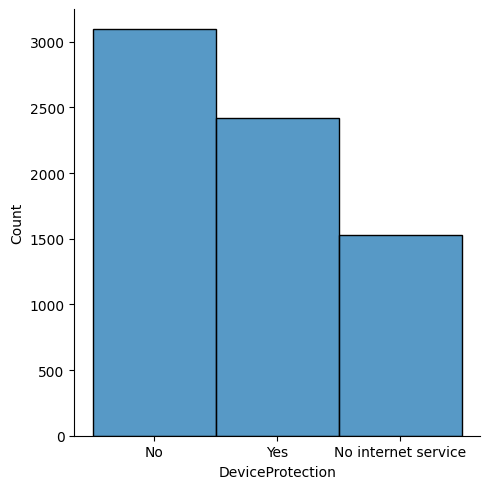

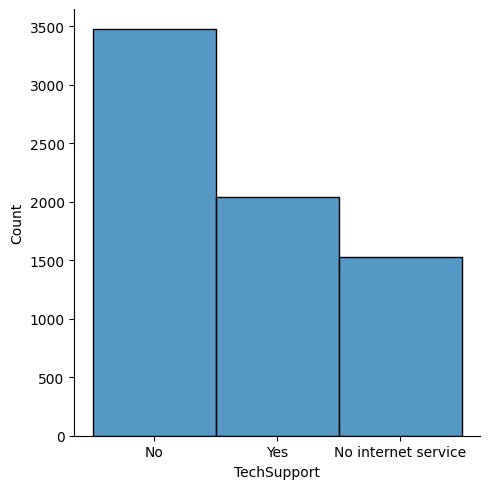

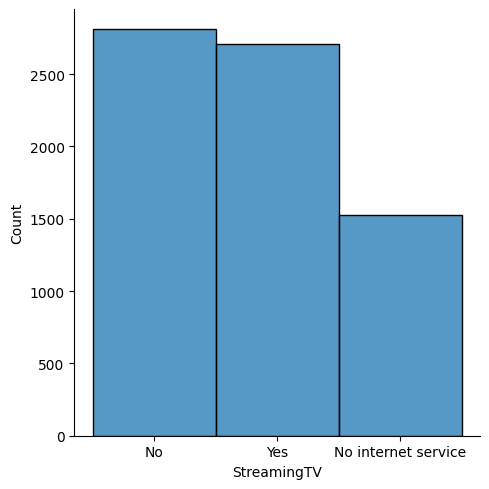

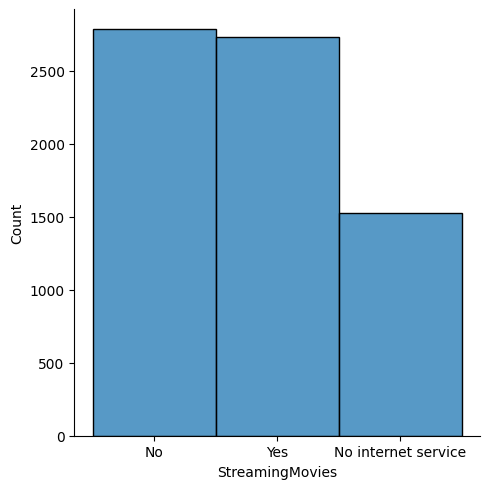

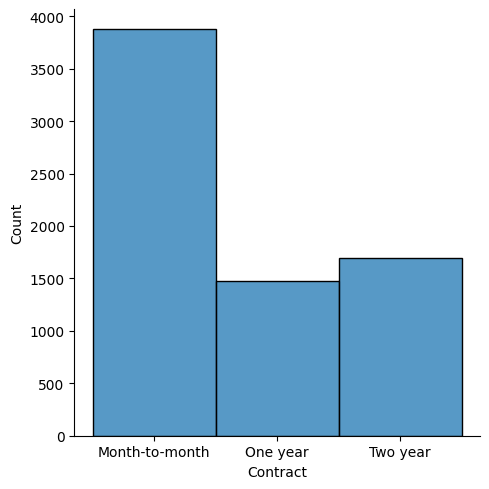

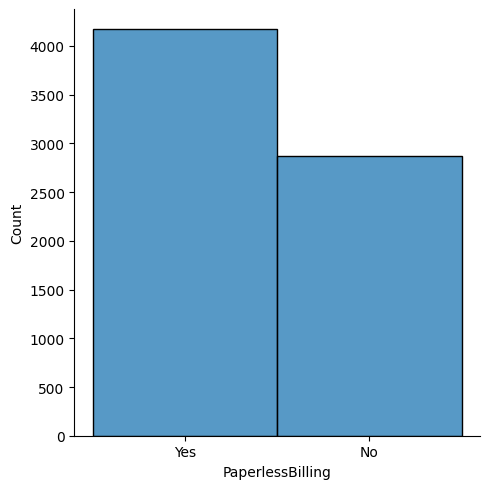

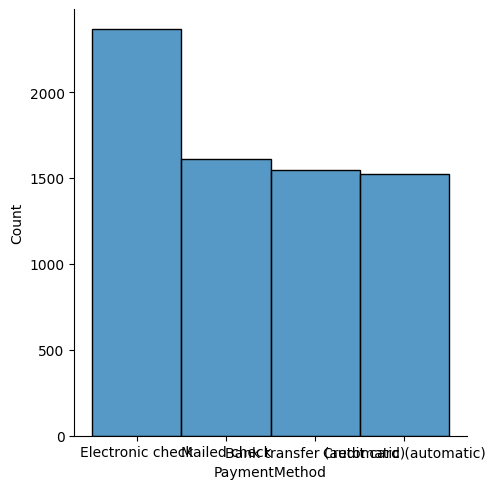

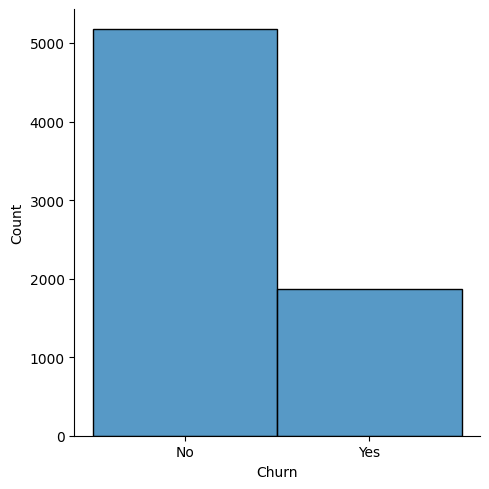

In [20]:
#now we will analyse the distribution of the categorical features

for col in df.select_dtypes(include=['object']).columns:
    sns.displot(df[col])
    plt.show()

In [21]:
#well from this plots we will focus on only 3 plots :
#1- gender which is evenly distributed between male and female wich is an important feature it tells us that or test or or sample of cosumers isnt biased 
#2- same for partner its evenly distributed
#3- churn tell us that the majority of our customers are not leaving the service but still the proba of leaving is 27% approximately which in terms business is not good 

In [22]:
#now we can start cleaning the actual data after exploring it 

In [23]:
#we will start by removing the null values in the totalcharges feature we will use for this a knn imputer with the tenur and the monthlycharges features

from sklearn.impute import KNNImputer 

imputer = KNNImputer(n_neighbors=3)
imputer.fit(df[['tenure','MonthlyCharges']])

df['TotalCharges'] = imputer.transform(df[['tenure','MonthlyCharges']])
df['TotalCharges'] = df['TotalCharges'].astype('float64')

df['TotalCharges'].isnull().sum()

np.int64(0)

In [24]:
#next we will change the categirical features into numerical features

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder

In [26]:
#we will use label encoder for features with yes and no 

label_features = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in label_features:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [27]:
#we will use and ordinal encoder for ordered features

contract_mapping = {"Month-to-month": 0, "One year": 1, "Two year": 2}
df["Contract"] = df["Contract"].map(contract_mapping)

In [28]:
#we will use a target encoder for payment method

target_encoder = TargetEncoder()
df["PaymentMethod"] = target_encoder.fit_transform(df["PaymentMethod"], df["Churn"])

In [29]:
#we can use one hot encoding for low feature categories 

df = pd.get_dummies(df, columns=["gender", "InternetService"], drop_first=True)

In [30]:
#for the features with no service and no we will encode all the no features with 0 and the yes with 1 

columns_to_encode = ["MultipleLines", "OnlineSecurity", "OnlineBackup", 
                     "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in columns_to_encode:
    df[col] = df[col].replace({"No internet service": 0, "No phone service": 0, "No": 0, "Yes": 1})


In [31]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0.452854,29.85,1.0,0,False,False,False
1,0,0,0,34,1,0,1,0,1,0,...,0,1,0,0.191067,56.95,34.0,0,True,False,False
2,0,0,0,2,1,0,1,1,0,0,...,0,0,1,0.191067,53.85,2.0,1,True,False,False
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0.167098,42.30,45.0,0,True,False,False
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0.452854,70.70,2.0,1,False,True,False


In [32]:
label_features = ['gender_Male', 'InternetService_Fiber optic', 'InternetService_No']
for col in label_features:
    df[col] = df[col].map({True: 1, False: 0})

In [33]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0.452854,29.85,1.0,0,0,0,0
1,0,0,0,34,1,0,1,0,1,0,...,0,1,0,0.191067,56.95,34.0,0,1,0,0
2,0,0,0,2,1,0,1,1,0,0,...,0,0,1,0.191067,53.85,2.0,1,1,0,0
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0.167098,42.30,45.0,0,1,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0.452854,70.70,2.0,1,0,1,0


In [34]:
#now we will check for important features and drop the less important ones
#we will use 4 techniques and we will keep the ones that are in commun in all of them

In [35]:
#first we will use the MI mutual information between the target and the features (measures how much information a feature contributes to the target)

from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['Churn']) 
y = df['Churn'] 

mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_scores)

MonthlyCharges                 0.173902
Contract                       0.098453
tenure                         0.079309
TotalCharges                   0.079309
InternetService_Fiber optic    0.047809
PaymentMethod                  0.044519
InternetService_No             0.031370
PaperlessBilling               0.019194
OnlineSecurity                 0.015885
TechSupport                    0.014608
Dependents                     0.014467
Partner                        0.011454
SeniorCitizen                  0.010577
OnlineBackup                   0.003460
DeviceProtection               0.002228
StreamingTV                    0.001981
StreamingMovies                0.001868
MultipleLines                  0.000801
PhoneService                   0.000072
gender_Male                    0.000037
dtype: float64


In [36]:
#next we will use ML model to itertivly remove the less important features (RFE for recursive feature elimination)

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10) #we will take only the top 10 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Partner', 'tenure', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'InternetService_Fiber optic'],
      dtype='object')


In [37]:
#next we will drop features with very low variance bettween them 

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1) 
X_selected = selector.fit_transform(X)
selected_cols = X.columns[selector.get_support()]

print("Remaining Features:", selected_cols)


Remaining Features: Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')


Highly Correlated Features to Drop: {'TotalCharges'}


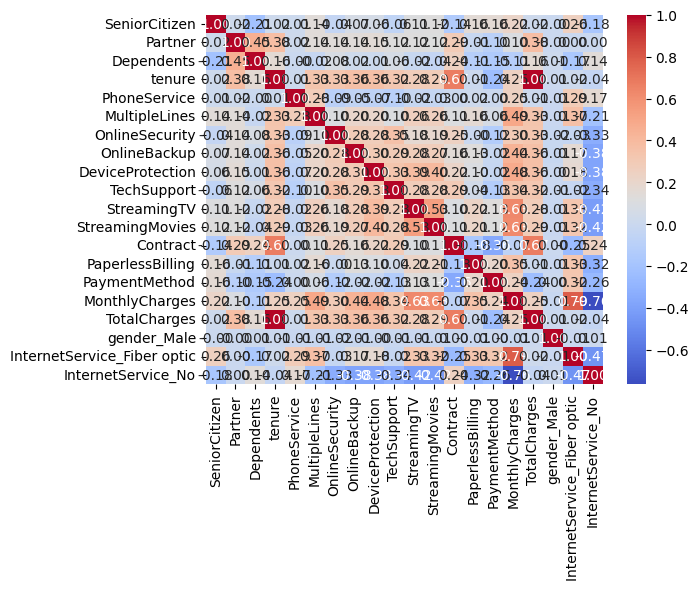

In [38]:
#lastly we can remove high correlated features 

corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

high_corr_features = set()
threshold = 0.85
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly Correlated Features to Drop:", high_corr_features)

In [39]:
#we will try to keep this features and see MonthlyCharges
#Contract ,tenure,InternetService_Fiber optic,TechSupport,PaperlessBilling,PaymentMethod,Partner 

In [40]:
df1=df[['Contract','tenure','InternetService_Fiber optic','TechSupport','PaperlessBilling','PaymentMethod','Partner','Churn']]  
df2=df

In [41]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(df1.drop(columns=['Churn']), df1['Churn'], test_size=0.2, random_state=42,shuffle=True)
x2_train, x2_test, y2_train, y2_test = train_test_split(df2.drop(columns=['Churn']), df2['Churn'], test_size=0.2, random_state=42,shuffle=True)


In [44]:
#now we will train 2 defrent models just to make sure (this training is not for the final model)just to see if the features we did choose are good or no its a kind of comparison betwwen df1 and df2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
}

In [45]:
for name, model in models.items():
    model.fit(x1_train, y1_train)  # train
    y_pred = model.predict(x1_test)  # predict
    
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y1_test, y_pred))
    print("Classification Report:\n", classification_report(y1_test, y_pred))
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.8069552874378992
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

--------------------------------------------------
Model: Random Forest
Accuracy: 0.7693399574166075
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.57      0.53      0.55       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409

--------------------------------------------------


In [46]:
for name, model in models.items():
    model.fit(x2_train, y2_train)
    y_pred = model.predict(x2_test)

    print(f"Model: {name} (df2)")
    print("Accuracy:", accuracy_score(y2_test, y_pred))
    print("Classification Report:\n", classification_report(y2_test, y_pred))
    print("-" * 50)


Model: Logistic Regression (df2)
Accuracy: 0.8176011355571328
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

--------------------------------------------------
Model: Random Forest (df2)
Accuracy: 0.7906316536550745
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

--------------------------------------------------


In [ ]:
#well our feetures selection is bad haha i will take some sleep and try again tomorrow ):